In [1]:

import pandas as pd
import numpy as np

def hh_mm_ss2seconds(hh_mm_ss):
   return reduce(lambda acc, x: acc*60 + x, map(int, hh_mm_ss.split(':')))
daily_consumption_data = pd.read_excel('DailyConsumption (4).xlsx', sep=r'\s{2,}',
                                      converters={'ON Load Duration': hh_mm_ss2seconds, 'Meter ON Duration': hh_mm_ss2seconds})
daily_consumption_data.head()

,CCMS ID,Timestamp,CCMS kWh,Grid kVAh,Meter ON Duration,ON Load Duration,Expected kWh
0,SMR03-0219-0792,2019-04-30 00:00:00,53.07,53.45,83701,36797,52.84
1,SMR03-0219-0792,2019-04-29 00:00:00,54.45,54.86,83970,37520,53.88
2,SMR03-0219-0792,2019-04-28 00:00:00,59.19,55.84,86309,38918,55.89
3,SMR03-0219-0792,2019-04-27 00:00:00,52.49,52.88,86320,40863,58.68
4,SMR03-0219-0792,2019-04-26 00:00:00,45.57,45.92,86271,39098,56.15


In [3]:
daily_consumption_data['Timestamp'] = pd.to_datetime(daily_consumption_data['Timestamp'])
daily_consumption_data.set_index('Timestamp', inplace=True)

# Relation between CCMS kWh, Grid kVAh, Expected kWh

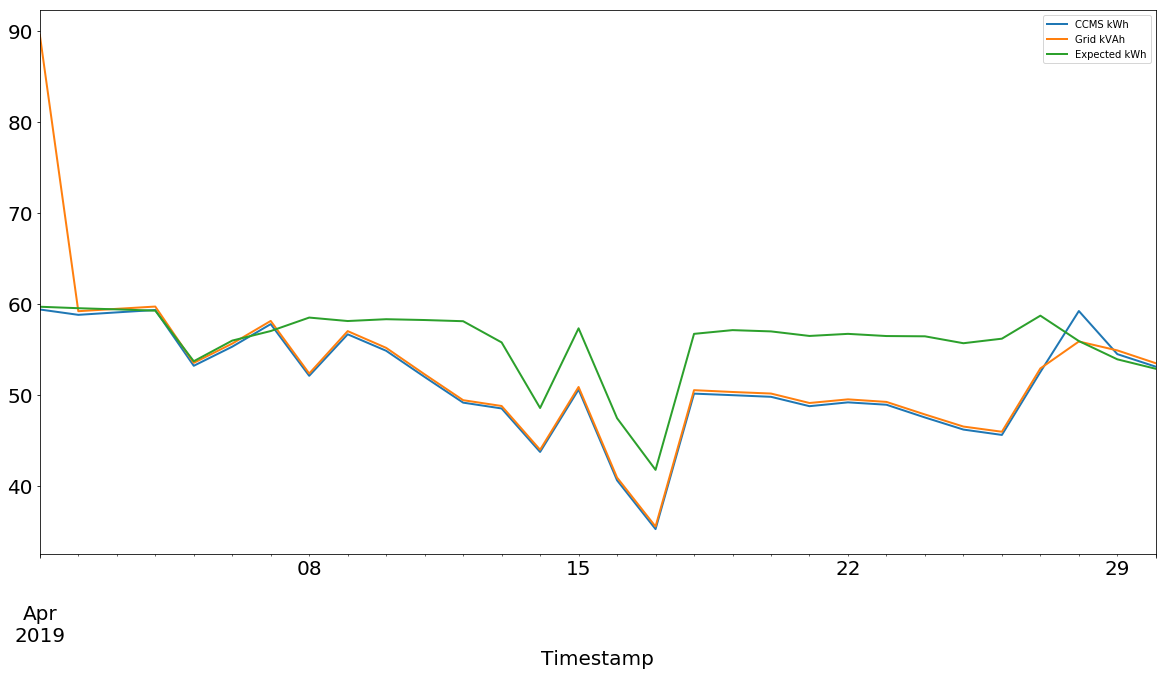

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
daily_consumption_data[['CCMS kWh', 'Grid kVAh', 'Expected kWh']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);

# Diff of meter-on-duration and Onload duration

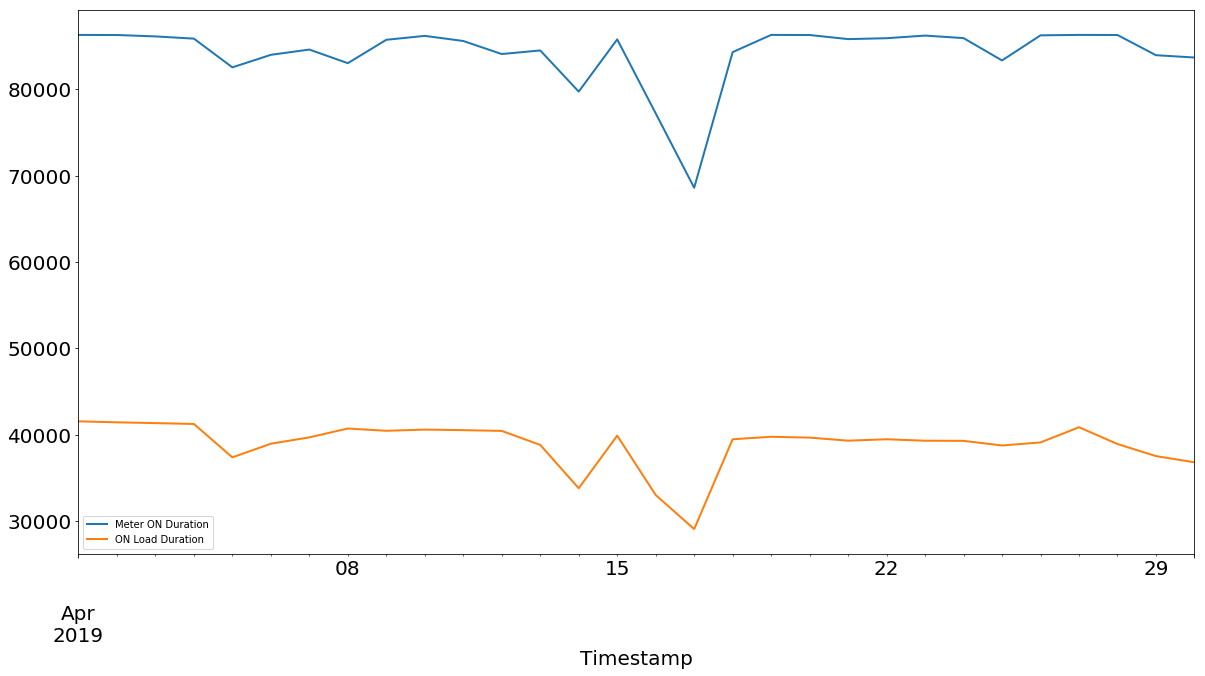

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
daily_consumption_data[['Meter ON Duration', 'ON Load Duration']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);

# Off load graph

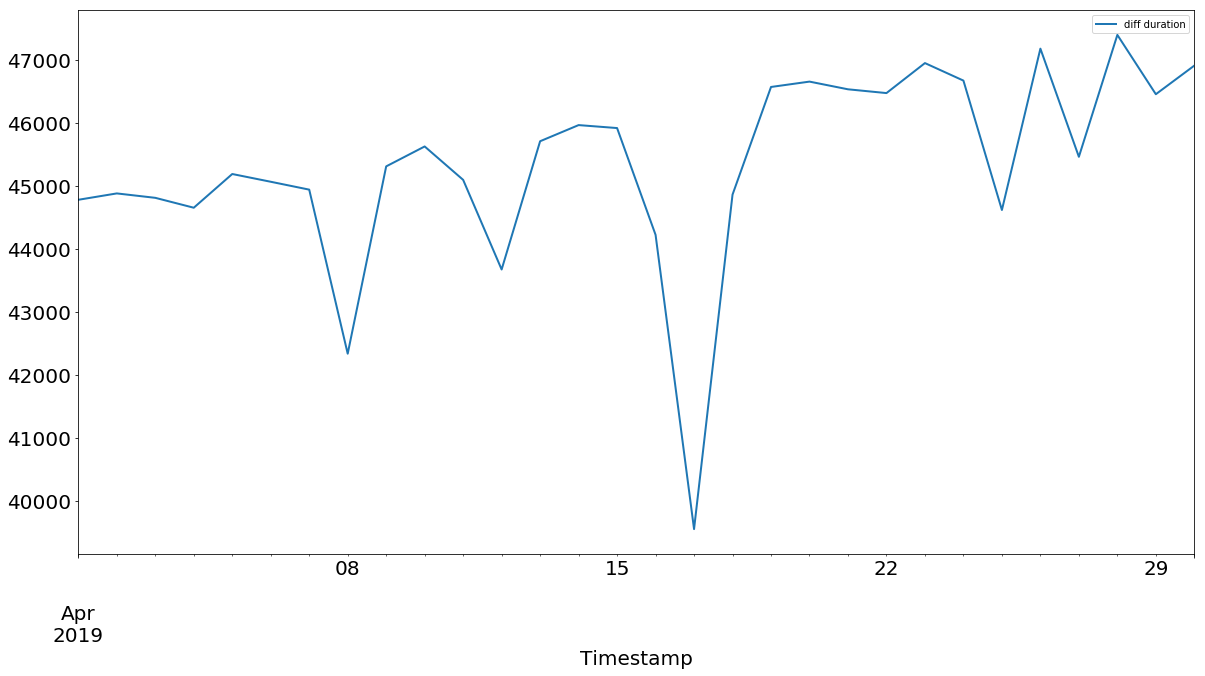

In [7]:
daily_consumption_data['diff duration'] = (daily_consumption_data['Meter ON Duration'] - daily_consumption_data['ON Load Duration'])

import matplotlib.pyplot as plt
%matplotlib inline

daily_consumption_data[['diff duration']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);
